# Research Skills: Spatiotemporal Data Analysis 
# Worksheet 4 - Temporal and Spatial Autoregression

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

Academic Year 2019-2020

This worksheet uses the following packages 
* statsmodel
* libpsyal 
* spreg (a regression and diagnosis library for spatial data) 
If you do not have pysal installed (on jupyterlab.uvt.nl), uncomment the following line to install spreg 

In [ ]:
#!pip install spreg 

In this practicum, you will work with two datasets: 
1. The monthly totals of international airline passengers (in thousands) from January 1949 to December 1960 (airline-passengers.csv). 
2. The airbnb price for each listing in Amsterdam (airbnb_features_ams.csv) 

# Temporal Autoregression 

In linear regression we assume that y and x are related with the following equation: 
\begin{equation}
\hat{y} = mx + b
\end{equation}
where $\hat{y}$ is the prediction,  $m$ and $b$ are the coefficients found from the data and $x$ is the input data. 

We can use this technique on time series data where the inputs are the observations at the previous time steps (lag variables). 
A regression model that uses data from the same input variable at previous time steps is called a temporal autoregression. With autoregression, we can predict 
For example, we
can predict the value for the next time step (t+1) given the observations at the current (t and
previous t-1).\
\begin{equation}
x(t+1) = m_{1} x(t) +  m_{2} x(t-1) + b
\end{equation}

The following code loads the airlines passengers dataset (which we used in Worksheet 2) and performs a quick check for autocorrelation with a lag plot.  

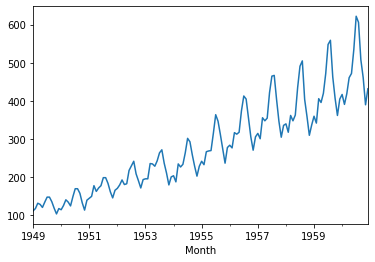

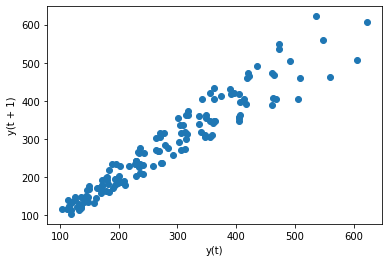

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plt.figure()
series.plot()

plt.figure()
pd.plotting.lag_plot(series)

The Pearson's correlation coeficient can numerically summarize how correlated two variables are. (-1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation. Correlation can be calculated easily using the corr() function. The code below calculates the correlation. 

In [2]:
import pandas as pd

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)


            t       t+1
t    1.000000  0.960195
t+1  0.960195  1.000000


1. Display the autocorrelation of the series. 

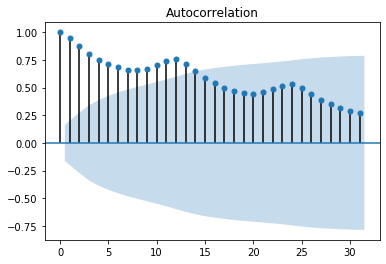

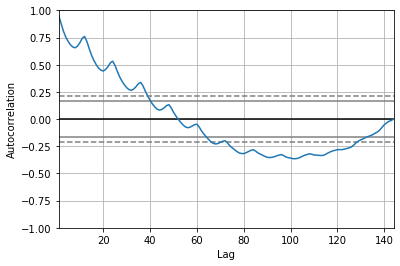

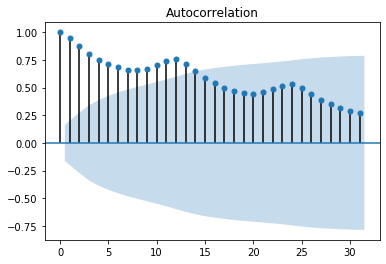

In [3]:
#
# Your code goes here 
#
pd.plotting.autocorrelation_plot(series)

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)

## 1.2 Persistance model 
The simplest prediction model that we could use would keep the last onservation the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an
autoregression model. The following code implements the presistance model. Change the 'days_to_forecast' 

Test RMSE: 65.913


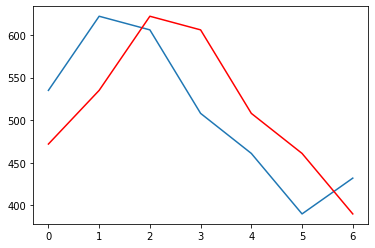

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
days_to_forecast = 7
X = dataframe.values
train, test = X[1:len(X)-days_to_forecast], X[len(X)-days_to_forecast:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

predictions = list()
for x in test_X:
    yhat = x #model_persistence(x)
    predictions.append(yhat)
    
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

## 1.3 Autoregression model 
The statsmodels library provides an autoregression model that automatically selects an appropriate lag value coefficients using statistical tests and trains a linear regression model. It is provided in the AR class. 
1. Create a lagged dataset (with a days_to_forecast of your choice) and split into train and test sets
2. Create the model AR() and then calling fit() to train it. Assign the output of the trained model to a variable model_fit. 
3. The function will return the following outpus: 
* model_fit.k_ar: which returns the optimal lag
* model_fit.params: which are the coeficients. 
Display these outputs. Do you agree with the optimal lag vaue? 

Lag: 13
Coefficients: [ 4.88262693  0.8316351  -0.08533882  0.04518569 -0.08011033  0.11990538
 -0.15401434  0.15586744 -0.16045268  0.14294898 -0.13787392  0.16694427
  0.90418468 -0.73904345]
predicted=409.732496, expected=407.000000
predicted=346.460864, expected=362.000000
predicted=375.714407, expected=405.000000
predicted=392.177639, expected=417.000000
predicted=377.298819, expected=391.000000
predicted=441.454656, expected=419.000000
predicted=429.728844, expected=461.000000
predicted=461.730253, expected=472.000000
predicted=516.317388, expected=535.000000
predicted=601.451298, expected=622.000000
predicted=613.886725, expected=606.000000
predicted=509.699909, expected=508.000000
predicted=450.039125, expected=461.000000
predicted=375.195776, expected=390.000000
predicted=408.193016, expected=432.000000
Test RMSE: 18.691


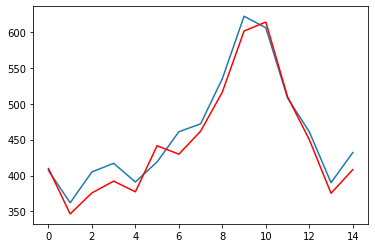

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#
# Your code goes here 
#
X = series.values
train, test = X[1:len(X)-15], X[len(X)-15:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Once trained, we can use the model to make a prediction by calling the predict() function for a number of observations in the future.

In [ ]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## 1.4 Autoregression models after detrending 
1. Remove the trend from the time series (see worksheet 2 for help)
2. Plot the autocorrelation. Can you tell what the peroidcity of the series is?
3. Apply a presistent mode and autoregression model on the detrended time series. 

Test RMSE: 33.029


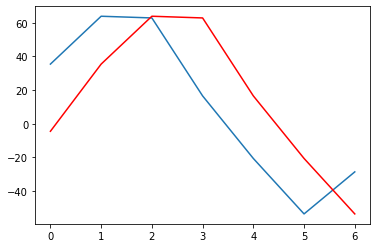

In [8]:
#
# Your code goes here 
#
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
result = seasonal_decompose(series, model='additive')


values = pd.DataFrame( result.seasonal)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
days_to_forecast = 7
X = dataframe.values
train, test = X[1:len(X)-days_to_forecast], X[len(X)-days_to_forecast:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

predictions = list()
for x in test_X:
    yhat = x #model_persistence(x)
    predictions.append(yhat)
    
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()



C:\Users\leeling\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 13
Coefficients: const            -4.440892e-16
L1.Passengers    -4.347826e-02
L2.Passengers    -8.695652e-02
L3.Passengers    -8.695652e-02
L4.Passengers    -8.695652e-02
L5.Passengers    -8.695652e-02
L6.Passengers    -8.695652e-02
L7.Passengers    -8.695652e-02
L8.Passengers    -8.695652e-02
L9.Passengers    -8.695652e-02
L10.Passengers   -8.695652e-02
L11.Passengers   -8.695652e-02
L12.Passengers    9.130435e-01
L13.Passengers   -4.347826e-02
dtype: float64
predicted=-20.642677, expected=-20.642677
predicted=-53.593434, expected=-53.593434
predicted=-28.619949, expected=-28.619949
predicted=-24.748737, expected=-24.748737
predicted=-36.188131, expected=-36.188131
predicted=-2.241162, expected=-2.241162
predicted=-8.036616, expected=-8.036616
predicted=-4.506313, expected=-4.506313
predicted=35.402778, expected=35.402778
predicted=63.830808, expected=63.830808
predicted=62.823232, expected=62.823232
predicted=16.520202, expected=16.520202
predicted=-20.642677, expected=-20.6426

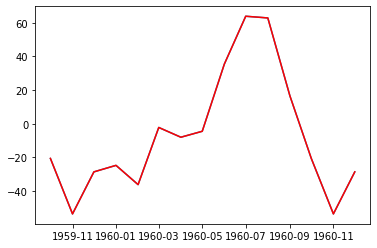

In [9]:
X =  result.seasonal
train, test = X[1:len(X)-15], X[len(X)-15:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 2. Spatial Autoregression 
This section introduces spatial autoregression with Python. We will use a set of Amstredam properties listed in AirBnb.

In [42]:
# Also check for spatial autocorrelation 
# 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal.model.spreg as sp
import pysal.lib as ps
import pysal.explore.esda as es

#import libpsyal as ps
#import spreg as sp 
#import esda as es
import geopandas as gpd

The following code loads a subset of the data from an airbnb dataset for Amsterdam. Then we extract a set of explanatory features of each listed property:

In [43]:
lst = pd.read_csv('airbnb_features_ams_red.csv')
lst = lst[['longitude','latitude', 'price','bedrooms','beds','bathrooms','guests_included']]

The data has a few missing values which pandas assigns "NaN" numbers. Remove the rows with missing values 

In [44]:
#
# Your code goes here 
#
lst.dropna(axis = 0,how='any', inplace=True)

It is common practice to introduce the price in logarithms. The code below converts the price to log and removes the dollar sign. 

In [45]:
#convert the price to log and removes the dollar sign 
y = np.log(\
           lst['price'].apply(lambda x: float(x.strip('$').replace(',', '')))\
           + 0.000001
          )


The following code fits the regression model. 
\begin{equation}
\ln(price_i) = b + \mathbf{m} \mathbf{X}_i + \epsilon_i$  
\end{equation}
where $\epsilon_i$ is the error term, $\mathbf{m}$ and $b$  are the coefficients found from the data and $\mathbf{X}$ 
is the input data. 

To run the model, we can use the spreg module in PySAL, which implements a standard oridinary least squares (OLS) routine, but is particularly well suited for regressions on spatial data. Also, although for the initial model we do not need it, the following code builds a spatial weights matrix that connects every observation to its 8 nearest neighbors. This will allow us to get extra diagnostics from the baseline model. 

In [46]:
w = ps.weights.KNN.from_array(lst.loc[lst.index, ['longitude', 'latitude']].values,10)
w.transform = 'r'
Wmatrix, ids = w.full()

In [47]:
m1 = sp.OLS(y.values[:, None], lst.drop('price', axis=1).values, w=w, spat_diag=True, name_x=lst.drop('price', axis=1).columns.tolist(), name_y='ln(price)')
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   ln(price)                Number of Observations:        6657
Mean dependent var  :      4.9304                Number of Variables   :           7
S.D. dependent var  :      0.5870                Degrees of Freedom    :        6650
R-squared           :      0.1858
Adjusted R-squared  :      0.1851
Sum squared residual:    1867.438                F-statistic           :    252.9098
Sigma-square        :       0.281                Prob(F-statistic)     :  2.985e-292
S.E. of regression  :       0.530                Log likelihood        :   -5215.013
Sigma-square ML     :       0.281                Akaike info criterion :   10444.025
S.E of regression ML:      0.5296                Schwarz criterion     :   10491.649

-----------------------------------------------------------------------------

Including a spatial weights object in the regression buys you an extra bit. We may want to add spatially lag variables that we think may affect the price of a house in a given location. For example, one could think that the number of beds represent might affect the price. If that is the case, then listed properties with more beds might be surround by other properties with more beds and everything else equal, be more expensive. To calculate the number of pools surrounding each property, we can build an alternative weights matrix that we do not row-standardize. 

In [48]:
w_beds = ps.weights.KNN.from_array(lst.loc[\
                               lst.index, \
                              ['longitude', 'latitude']\
                              ].values)

C:\Users\leeling\Anaconda3\lib\site-packages\pysal\lib\weights\weights.py:170: UserWarning: The weights matrix is not fully connected. There are 414 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


With the spatial weights, we can calculate the spatial lag and add it to the list of features. 

In [49]:
lst_w = lst.assign(w_beds=ps.weights.lag_spatial(w_beds, lst['beds'].values))
display(lst_w)

,longitude,latitude,price,bedrooms,beds,bathrooms,guests_included,w_beds
0,4.94142,52.36575,$59.00,1.0,2.0,1.5,1,3.0
1,4.89208,52.38673,$155.00,1.0,1.0,1.0,1,2.0
2,4.84838,52.35132,$219.00,3.0,3.0,1.0,4,3.0
3,4.88932,52.37537,$210.00,2.0,4.0,1.0,2,3.0
4,4.87447,52.36799,$140.00,2.0,2.0,1.0,2,3.0
...,...,...,...,...,...,...,...,...
6668,4.92977,52.37185,$95.00,1.0,1.0,1.0,1,2.0
6669,4.88524,52.38142,$120.00,1.0,1.0,1.0,1,2.0
6670,4.91131,52.37328,$189.00,1.0,1.0,1.0,2,3.0
6671,4.97859,52.35037,$21.00,1.0,1.0,1.0,1,7.0


The following code fits the autoregression model. 

In [50]:
m2 = sp.OLS(y.values[:, None], \
                  lst_w.drop('price', axis=1).values, \
                  w=w, spat_diag=True, \
                  name_x=lst_w.drop('price', axis=1).columns.tolist(), name_y='ln(price)')
print(m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   ln(price)                Number of Observations:        6657
Mean dependent var  :      4.9304                Number of Variables   :           8
S.D. dependent var  :      0.5870                Degrees of Freedom    :        6649
R-squared           :      0.1880
Adjusted R-squared  :      0.1871
Sum squared residual:    1862.389                F-statistic           :    219.9103
Sigma-square        :       0.280                Prob(F-statistic)     :  6.284e-295
S.E. of regression  :       0.529                Log likelihood        :   -5206.000
Sigma-square ML     :       0.280                Akaike info criterion :   10428.000
S.E of regression ML:      0.5289                Schwarz criterion     :   10482.428

-----------------------------------------------------------------------------

# 3. Advanced Level : Spatial Autocorrelation 
1. Find the global and local autocorrelation of this dataset. 
2. Plot a variogram of the prices vs distance  

In [51]:
#
# Your code goes here 
#
#1 
# Global autocorrelation: 
w_beds_lag = ps.weights.lag_spatial(w, lst['beds'].values)
I_w_beds = es.moran.Moran(w_beds_lag, w)
print(I_w_beds.I, I_w_beds.p_sim)

# Local autocorrelation: 
IL_w_beds =  es.moran.Moran_Local(w_beds_lag, w)


0.7267750251290549 0.001


In [52]:
#2 
#P = np.array(z[['x','y','por']])
P = np.array(lst[['latitude','longitude']])
P = np.c_[ P, y]    
distance= []
diffprice = []
psize = P[:,:2].shape
print(psize)

for i in np.arange(0,psize[0],1):
    for j in np.arange(i+1,psize[0],1):
        diffx = P[i,:][0] - P[j,:][0]
        diffy = P[i,:][1] - P[j,:][1]
        diffpr = P[i,:][2] - P[j,:][2]
        distance.append(np.sqrt(diffx*diffx + diffy*diffy))
        diffprice.append(diffpr*diffpr)


(6657, 2)


NameError: name 'por_diff' is not defined

In [ ]:

plt.scatter(distance,diffprice)
plt.title('Distance vs Price Difference (%)')
plt.xlabel('Distance')
plt.ylabel('Price Difference (%)')

References: 
[1] Brownlee, J.  "Introduction to Time Series Forecasting with Python", 2019
[2] Arribas-Bel, D. Geographic data science'16, 2017.